In [1]:
from typing import Any, Callable, Iterable, Sequence, Union, cast

import matplotlib.pyplot as plt
import numpy as np
import pkg_resources
from modelbase.ode import Model, Simulator
from numpy.typing import NDArray
from scipy.integrate import solve_ivp

Vector = Union[Sequence[float], NDArray[np.float64]]
Float = Union[float, np.float64]

for pkg in ("modelbase", "assimulo"):
    print(f"{pkg} version: {pkg_resources.get_distribution(pkg).version}")


def time_points(start: float, end: float, points: int) -> dict[str, tuple[float, float] | NDArray]:
    t_eval = np.linspace(start, end, points)
    t_span: tuple[float, float] = (t_eval[0], t_eval[-1])
    return dict(t_span=t_span, t_eval=t_eval)

modelbase version: 1.18.6
assimulo version: 3.2.9


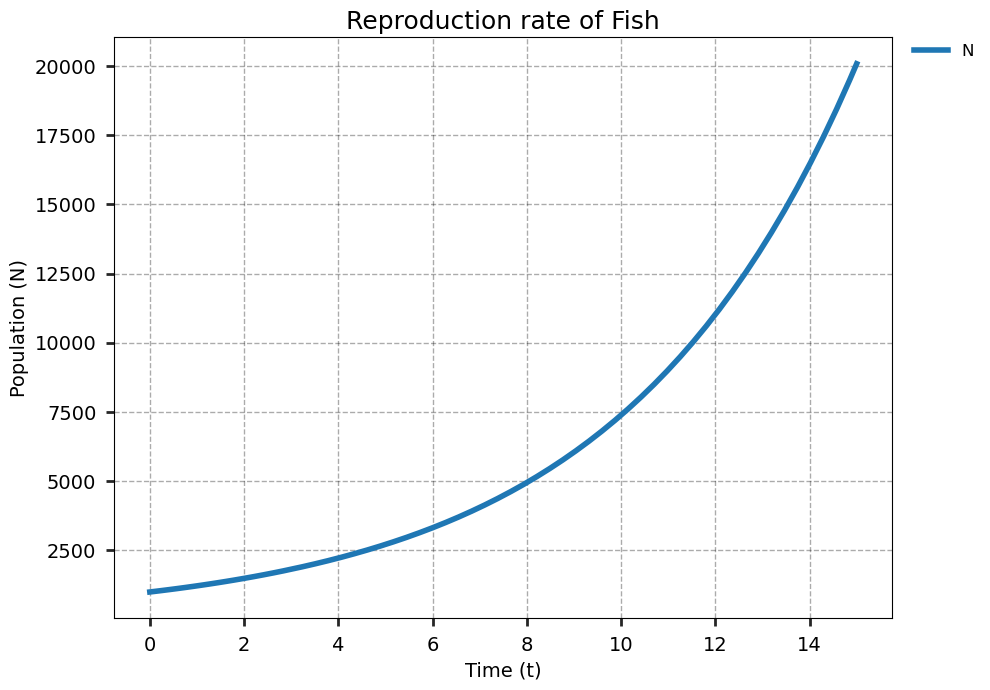

In [34]:
m = Model()
m.add_compound('N')
m.add_parameters({'r': 0.1})


def growth(N,r):
    return N*r


m.add_reaction_from_args(
    rate_name= "Growth_rate_of_fish", 
    function=growth, 
    stoichiometry={'N':1}, 
    args=["N", "r"]
    )

m.update_parameter('r',0.2)

s=Simulator(m)
s.initialise({'N': 1000})
s.simulate(15)
fig,ax=s.plot(title= "Reproduction rate of Fish", 
xlabel = "Time (t)", 
ylabel="Population (N)")

In [24]:
s.get_results_df()

,N
0.000000,1000.000000
0.000707,1000.070751
0.001415,1000.141507
0.003345,1000.334590
0.005276,1000.527706
...,...
23.064233,10038.458037
23.617441,10609.441887
24.170649,11212.903091
24.723858,11850.688949


$\frac{dN}{dt} = input +uptake$

$\frac{dp}{dt} =reproduction_{uptake} - death$

In [13]:
m_plankton = Model()
m_plankton.add_compounds(['N','P'])
m_plankton.add_parameters({'a': 0.00075, 'u':1, 'r':1,'d':0.1})


In [14]:

def uptake(u,N,P):
    return u*N*P
def reproduction(r,N,P):
    return r*N*P
def death(d,p):
    return d*p


In [15]:

m_plankton.add_reaction(
    rate_name= "input", 
    function=lambda x: x, 
    stoichiometry={'N':1}, 
    parameters=["a"]
    )


In [16]:

m_plankton.add_reaction_from_args(
    rate_name="uptake", 
    function=uptake, 
    stoichiometry={'N':-1}, 
    args=["u", "N", "P"]
    )


In [17]:

m_plankton.add_reaction_from_args(
    rate_name= "reproduction", 
    function=reproduction, 
    stoichiometry={'P':1}, 
    args=["r", "N", "P"]
    )


In [18]:

m_plankton.add_reaction_from_args(
    rate_name= "death", 
    function=death, 
    stoichiometry={'P':-1}, 
    args=["d", "P"]
    )
    


In [19]:
m_plankton.get_stoichiometric_df()


,death,input,reproduction,uptake
N,0.0,1.0,0.0,-1.0
P,-1.0,0.0,1.0,0.0


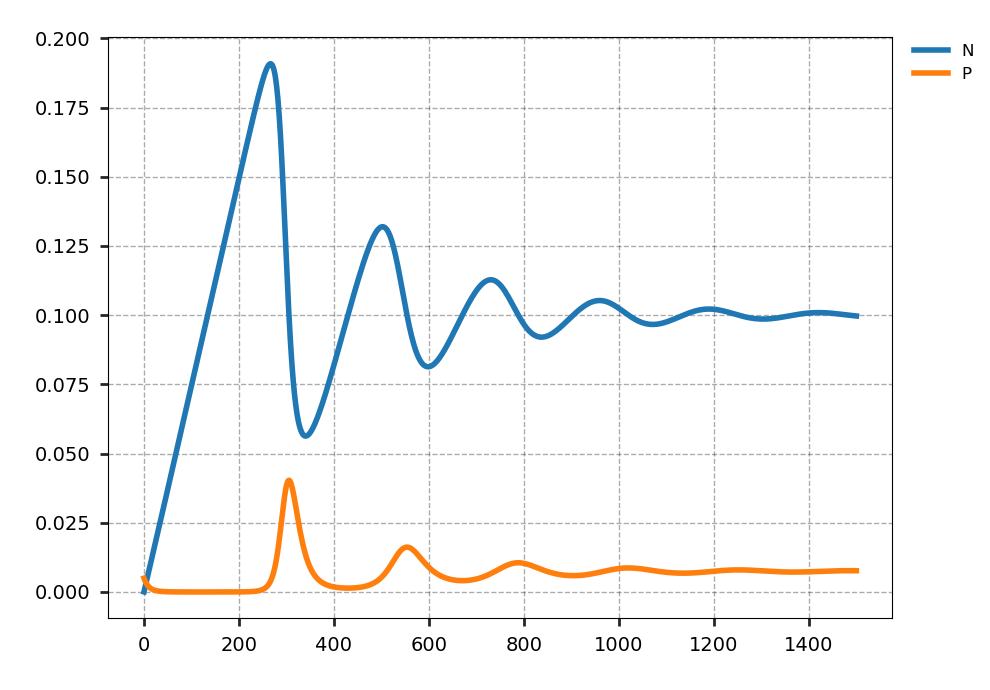

In [20]:
S=Simulator(m_plankton)
S.initialise({'N': 0.00005, 'P':0.005})
S.simulate(1500)
fig,ax=S.plot(title= " ", 
xlabel = " ", 
ylabel=" ")

In [43]:
m_plankton.get_stoichiometric_df()

,death,input,reproduction,uptake
N,0.0,1.0,0.0,1.0
P,-1.0,0.0,1.0,0.0
